## **Proyek Analisis Data: E-Commerce Public Dataset**
- Nama          : Allycia Joan Micheline
- Email         : allycia.joan@student.pradita.ac.id
- ID Dicoding   : allycia_joan

#### **Menentukan Pertanyaan Bisnis**

- Are there any seasonal trend in sales across different product categories? Which product categories have the most order?
- What are the cross-selling opportunities based on customer purchase patterns?

####  **Import Semua Packages/Library yang Digunakan**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

#### **Data Wrangling**

##### Gathering Data

In [3]:
# Directory containing the CSV
data_dir = "data/"

# Opening datasets individually
geolocation = pd.read_csv(data_dir  + 'geolocation_dataset.csv')
items = pd.read_csv(data_dir  + 'order_items_dataset.csv')
reviews = pd.read_csv(data_dir  + 'order_reviews_dataset.csv')
payments = pd.read_csv(data_dir  + 'order_payments_dataset.csv')
orders = pd.read_csv(data_dir  + 'orders_dataset.csv')
products = pd.read_csv(data_dir  + 'products_dataset.csv')
customers = pd.read_csv(data_dir + 'customers_dataset.csv')
sellers = pd.read_csv(data_dir + 'sellers_dataset.csv')
category = pd.read_csv(data_dir + 'product_category_name_translation.csv')

##### Assessing Data

Check for missing values for each dataset

In [4]:
# Check for missing values
print(customers.isnull().sum())
print(geolocation.isnull().sum())
print(items.isnull().sum())
print(payments.isnull().sum())
print(reviews.isnull().sum())
print(orders.isnull().sum())
print(products.isnull().sum())
print(sellers.isnull().sum())

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64
order_id                            0
customer_id                         0
order_st

##### Cleaning Data

In [5]:
# Handling missing values in orders
orders_cleaned = orders.dropna(subset=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'])

# Handling missing product details by dropping rows with missing product information
products_cleaned = products.dropna(subset=['product_category_name', 'product_name_lenght', 'product_description_lenght'])

# Convert date columns to datetime format using .loc to avoid SettingWithCopyWarning
orders_cleaned.loc[:, 'order_purchase_timestamp'] = pd.to_datetime(orders_cleaned['order_purchase_timestamp'])
orders_cleaned.loc[:, 'order_approved_at'] = pd.to_datetime(orders_cleaned['order_approved_at'])
orders_cleaned.loc[:, 'order_delivered_carrier_date'] = pd.to_datetime(orders_cleaned['order_delivered_carrier_date'])
orders_cleaned.loc[:, 'order_delivered_customer_date'] = pd.to_datetime(orders_cleaned['order_delivered_customer_date'])
orders_cleaned.loc[:, 'order_estimated_delivery_date'] = pd.to_datetime(orders_cleaned['order_estimated_delivery_date'])

# Dropping missing or invalid product dimensions
products_cleaned = products_cleaned.dropna(subset=['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'])

#### **Explatory Data Analysis (EDA)**

1. Explore Customers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000
Total unique customers: 99441


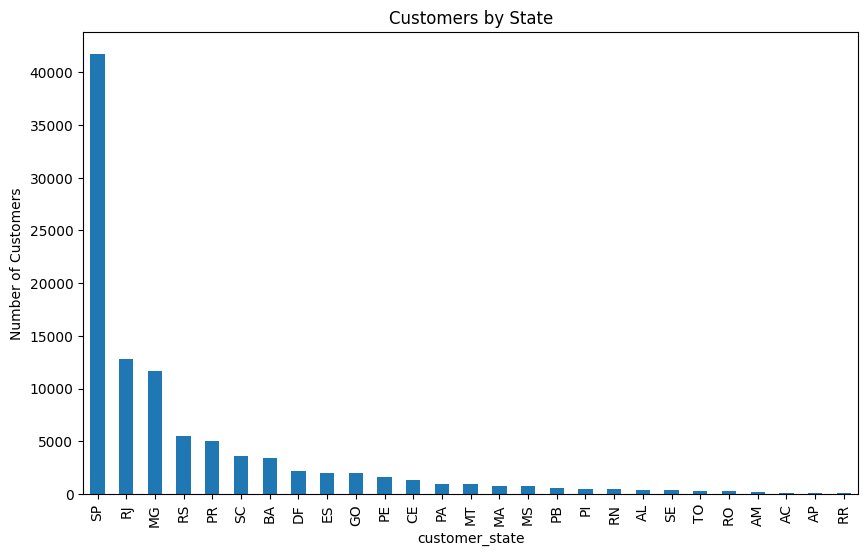

In [6]:
# View the structure of the customer data
print(customers.info())
print(customers.describe())

# Count unique customers
unique_customers = customers['customer_id'].nunique()
print(f"Total unique customers: {unique_customers}")

# Explore customer location data
customer_location = customers.groupby('customer_state')['customer_id'].count().sort_values(ascending=False)
customer_location.plot(kind='bar', figsize=(10,6))
plt.title("Customers by State")
plt.ylabel("Number of Customers")
plt.show()

2. Explore Orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None
                                order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc5467

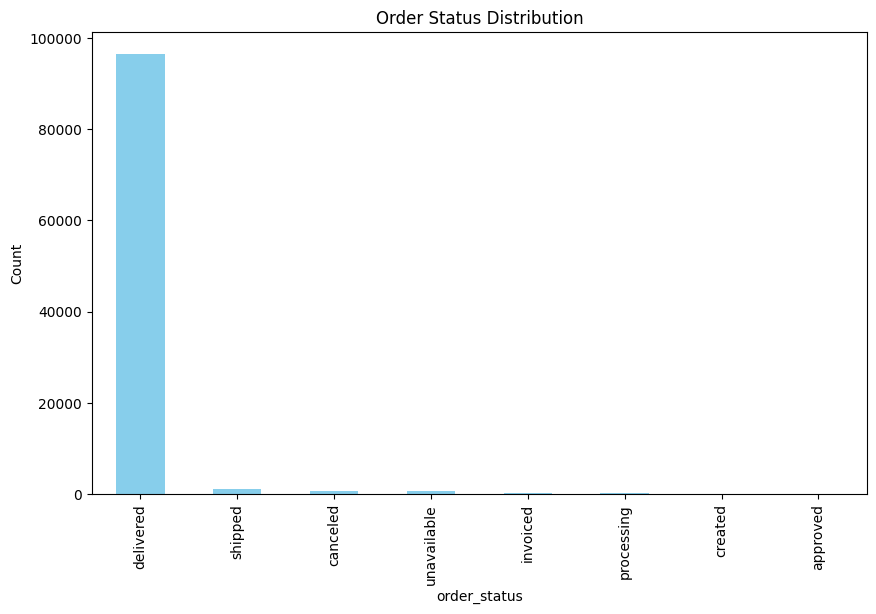

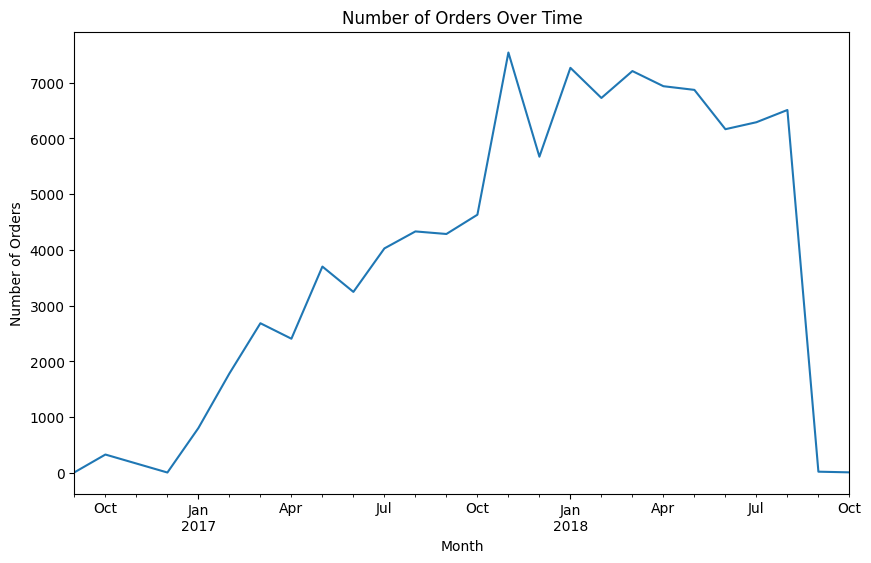

In [7]:
# Explore orders data
print(orders.info())
print(orders.describe())

# Explore the distribution of order statuses
order_status_counts = orders['order_status'].value_counts()
order_status_counts.plot(kind='bar', figsize=(10,6), color='skyblue')
plt.title("Order Status Distribution")
plt.ylabel("Count")
plt.show()

# Analyze order purchase time
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_purchase_month'] = orders['order_purchase_timestamp'].dt.to_period('M')

# Plot orders over time
orders.groupby('order_purchase_month')['order_id'].count().plot(kind='line', figsize=(10,6))
plt.title("Number of Orders Over Time")
plt.ylabel("Number of Orders")
plt.xlabel("Month")
plt.show()


3. Explore Payments

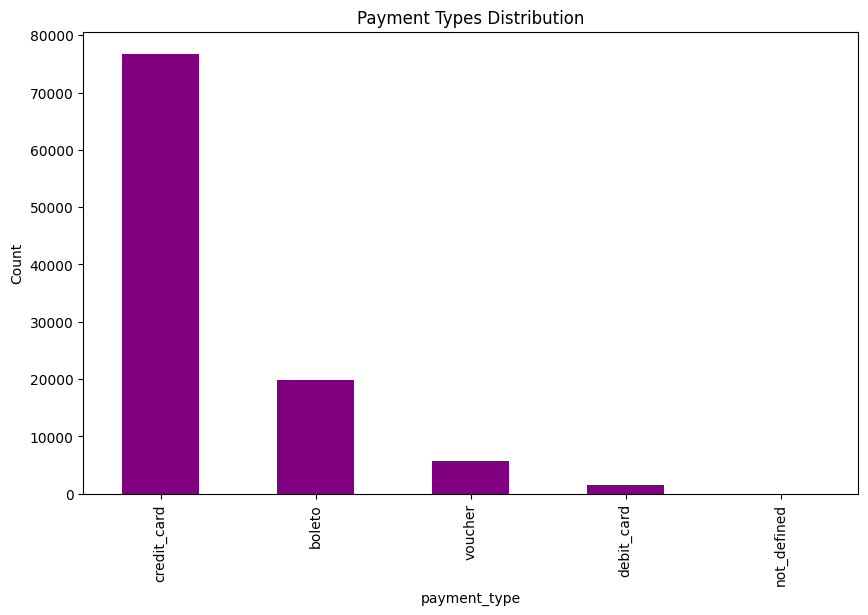

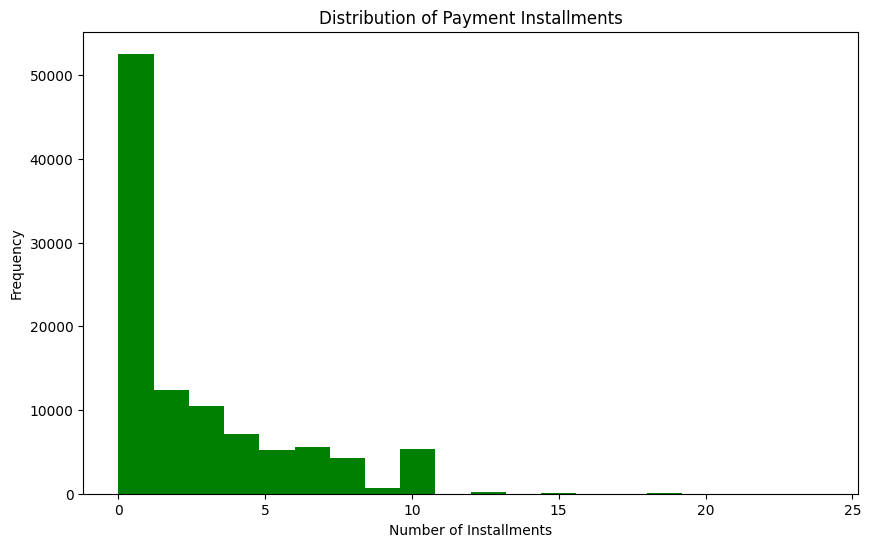

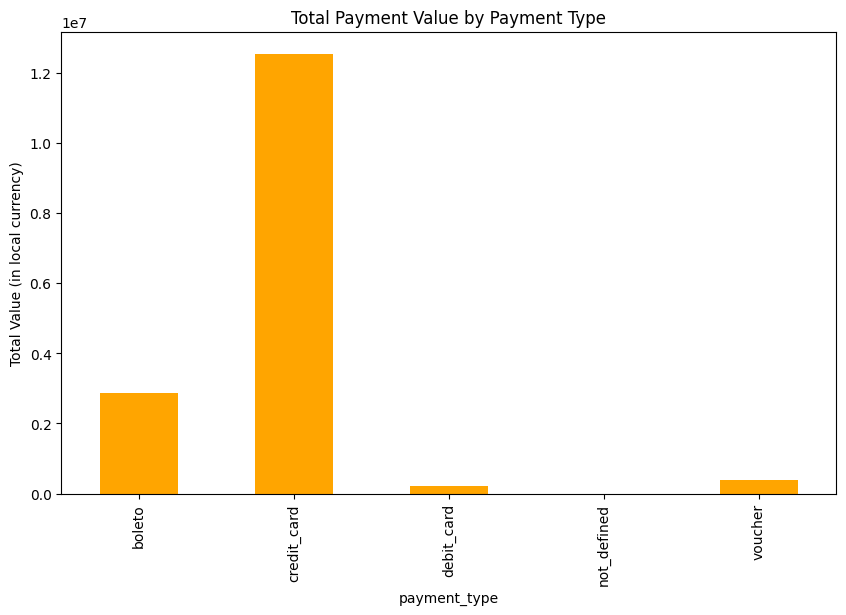

In [8]:
# Analyze payment types
payment_type_counts = payments['payment_type'].value_counts()
payment_type_counts.plot(kind='bar', figsize=(10,6), color='purple')
plt.title("Payment Types Distribution")
plt.ylabel("Count")
plt.show()

# Analyze payment installments
payments['payment_installments'].plot(kind='hist', bins=20, figsize=(10,6), color='green')
plt.title("Distribution of Payment Installments")
plt.xlabel("Number of Installments")
plt.ylabel("Frequency")
plt.show()

# Payment value analysis
payments.groupby('payment_type')['payment_value'].sum().plot(kind='bar', figsize=(10,6), color='orange')
plt.title("Total Payment Value by Payment Type")
plt.ylabel("Total Value (in local currency)")
plt.show()


4. Explore Items & Sellers

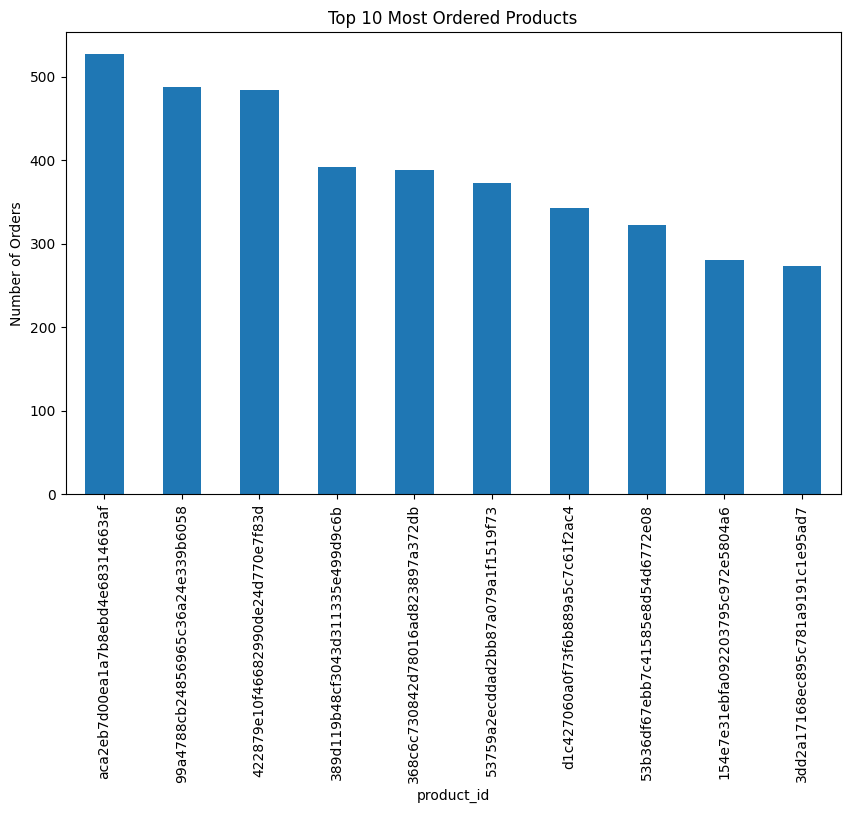

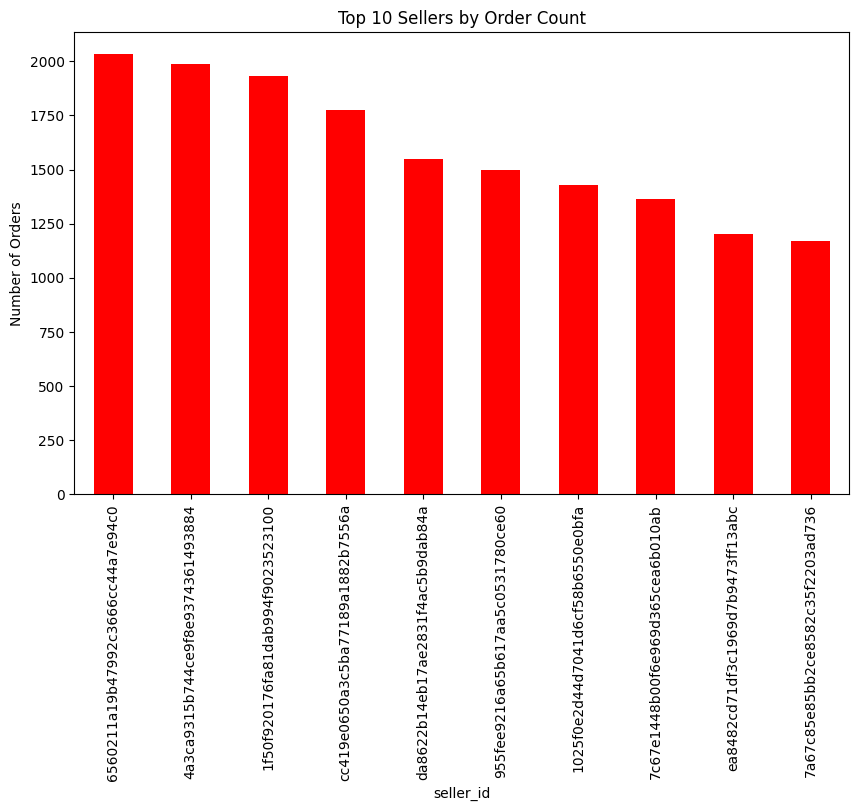

In [9]:
# Analyze the most ordered products
most_ordered_products = items.groupby('product_id')['order_id'].count().sort_values(ascending=False)
most_ordered_products.head(10).plot(kind='bar', figsize=(10,6))
plt.title("Top 10 Most Ordered Products")
plt.ylabel("Number of Orders")
plt.show()

# Seller analysis
seller_order_count = items.groupby('seller_id')['order_id'].count().sort_values(ascending=False)
seller_order_count.head(10).plot(kind='bar', figsize=(10,6), color='red')
plt.title("Top 10 Sellers by Order Count")
plt.ylabel("Number of Orders")
plt.show()


5. Explore Products & Categories

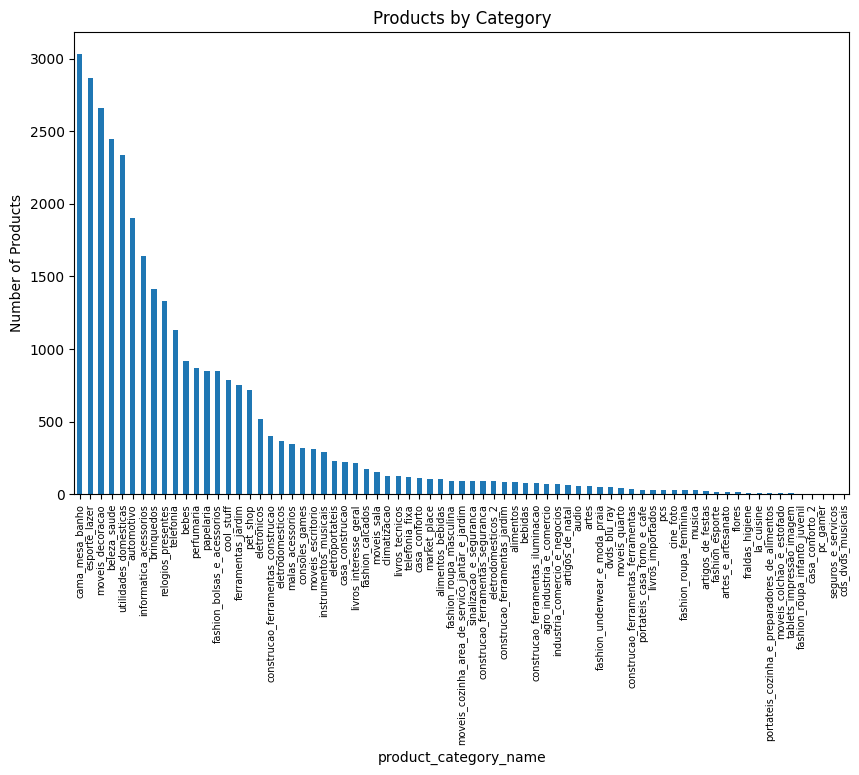

In [10]:
# Merge product categories with translation
prod = products.merge(category, on='product_category_name', how='left')

# Analyze products by category
product_category_counts = prod['product_category_name'].value_counts()
product_category_counts.plot(kind='bar', figsize=(10,6))
plt.title("Products by Category")
plt.ylabel("Number of Products")
plt.xticks(size=7)
plt.show()


6. Explore Geolocation

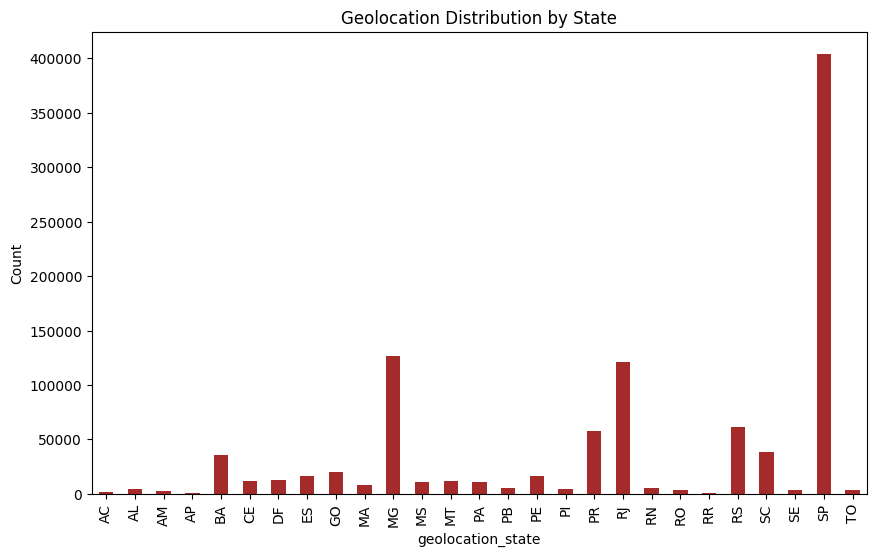

In [11]:
# Merge geolocation data with customer data
geolocation_agg = geolocation.groupby(['geolocation_state']).size()
geolocation_agg.plot(kind='bar', figsize=(10,6), color='brown')
plt.title("Geolocation Distribution by State")
plt.ylabel("Count")
plt.show()


7. Explore Time-Based Order

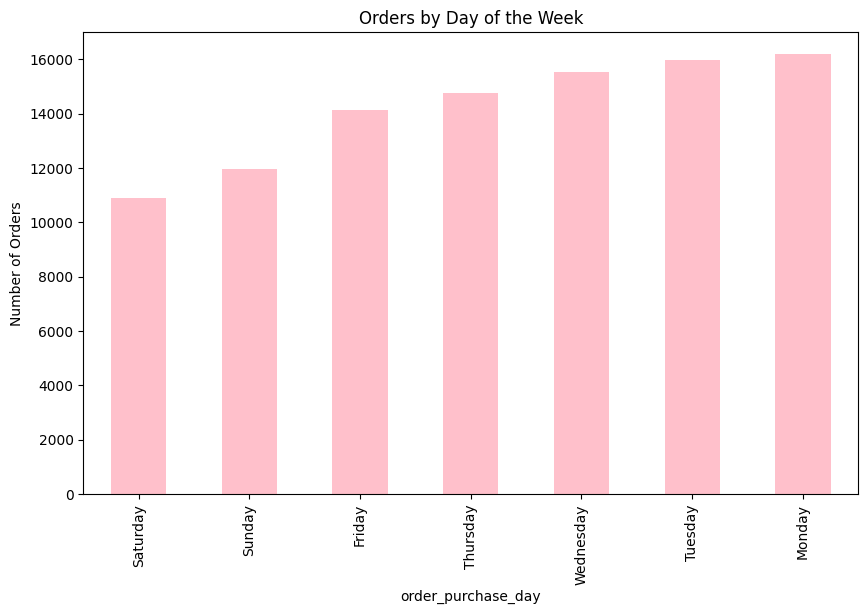

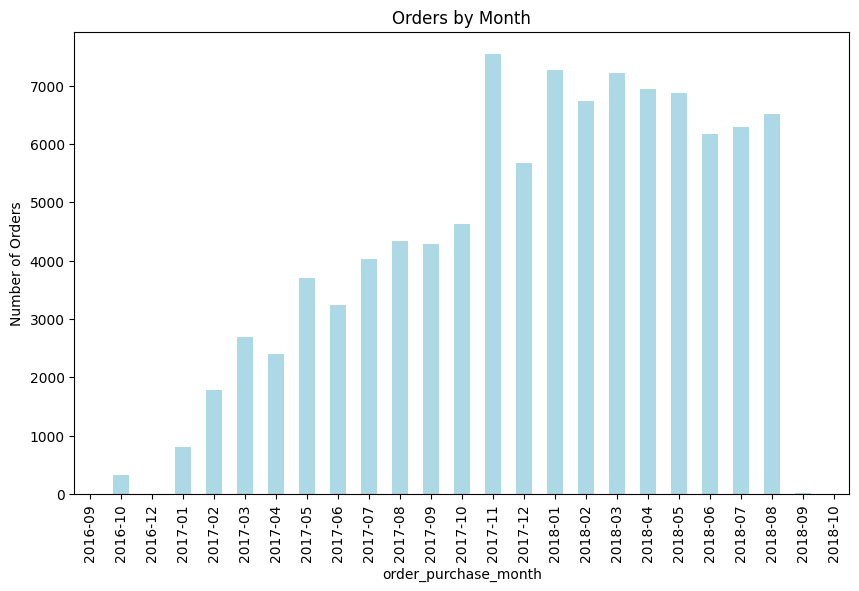

In [12]:
# Orders per day of the week
orders['order_purchase_day'] = orders['order_purchase_timestamp'].dt.day_name()
orders_by_day = orders.groupby('order_purchase_day')['order_id'].count().sort_values()
orders_by_day.plot(kind='bar', figsize=(10,6), color='pink')
plt.title("Orders by Day of the Week")
plt.ylabel("Number of Orders")
plt.show()

# Monthly order distribution
orders.groupby('order_purchase_month')['order_id'].count().plot(kind='bar', figsize=(10,6), color='lightblue')
plt.title("Orders by Month")
plt.ylabel("Number of Orders")
plt.show()

8. Customer Order Frequency

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   customer_id                    112650 non-null  object        
 2   order_status                   112650 non-null  object        
 3   order_purchase_timestamp       112650 non-null  datetime64[ns]
 4   order_approved_at              112635 non-null  object        
 5   order_delivered_carrier_date   111456 non-null  object        
 6   order_delivered_customer_date  110196 non-null  object        
 7   order_estimated_delivery_date  112650 non-null  object        
 8   order_purchase_month           112650 non-null  period[M]     
 9   order_purchase_day             112650 non-null  object        
 10  customer_unique_id             112650 non-null  object        
 11  

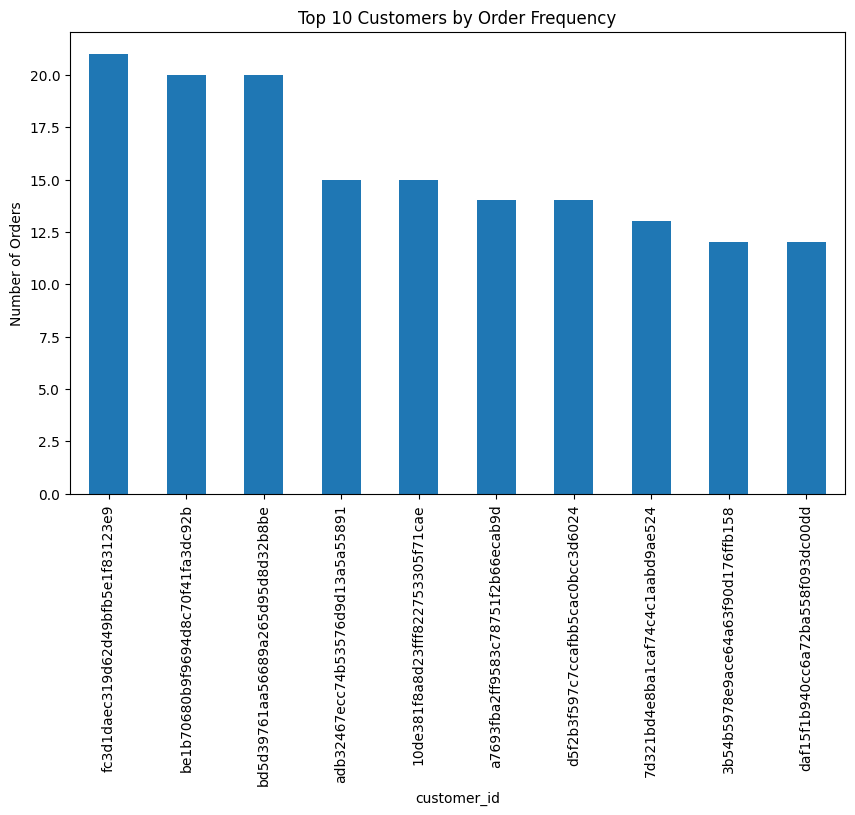

In [13]:
# Merge orders, customers, order_items, products, and sellers data
full_data = orders.merge(customers, on='customer_id', how='inner')\
                .merge(items, on='order_id', how='inner')\
                .merge(products, on='product_id', how='inner')\
                .merge(sellers, on='seller_id', how='inner')\
                .merge(category, on='product_category_name', how='left')

# Basic stats on the combined dataset
print(full_data.info())
print(full_data.describe())

# Customer order frequency
customer_order_counts = full_data.groupby('customer_id')['order_id'].count().sort_values(ascending=False)
customer_order_counts.head(10).plot(kind='bar', figsize=(10,6))
plt.title("Top 10 Customers by Order Frequency")
plt.ylabel("Number of Orders")
plt.show()

9. Revenue per Product

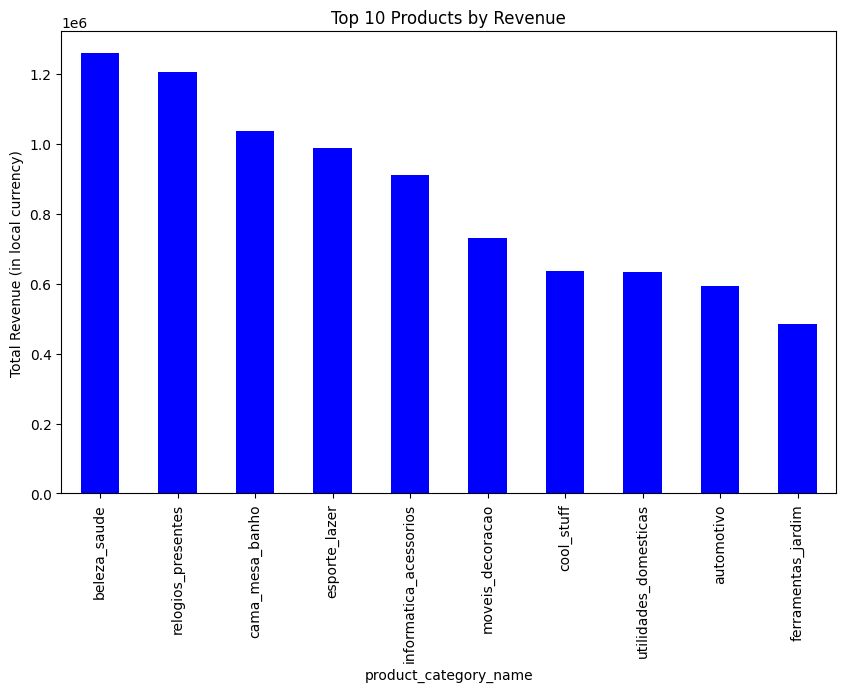

In [14]:
# Revenue generated per product
product_revenue = full_data.groupby('product_category_name')['price'].sum().sort_values(ascending=False)
product_revenue.head(10).plot(kind='bar', figsize=(10,6), color='blue')
plt.title("Top 10 Products by Revenue")
plt.ylabel("Total Revenue (in local currency)")
plt.show()

10. Top Sellers by Sales

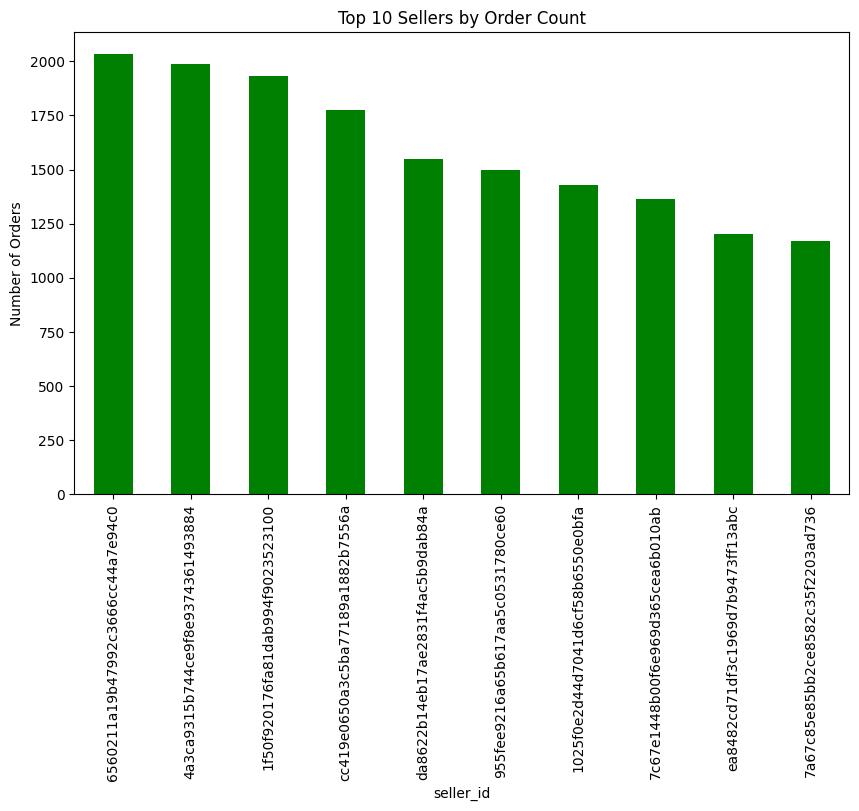

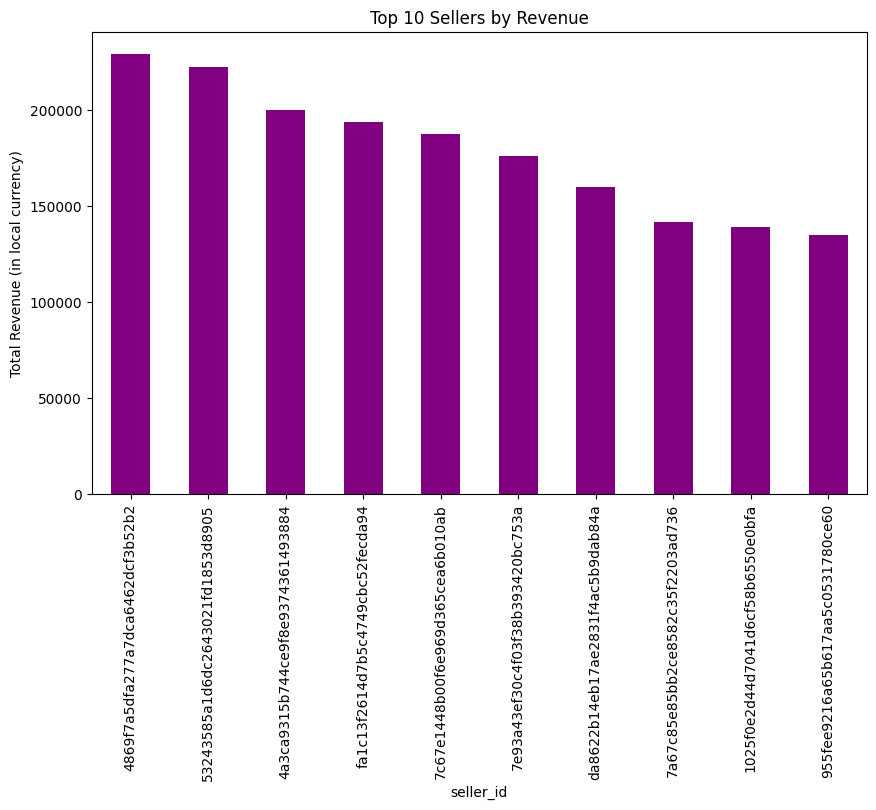

In [15]:
# Top sellers based on the number of sales (order count)
top_sellers = full_data.groupby('seller_id')['order_id'].count().sort_values(ascending=False)
top_sellers.head(10).plot(kind='bar', figsize=(10,6), color='green')
plt.title("Top 10 Sellers by Order Count")
plt.ylabel("Number of Orders")
plt.show()

# Top sellers based on total revenue
seller_revenue = full_data.groupby('seller_id')['price'].sum().sort_values(ascending=False)
seller_revenue.head(10).plot(kind='bar', figsize=(10,6), color='purple')
plt.title("Top 10 Sellers by Revenue")
plt.ylabel("Total Revenue (in local currency)")
plt.show()

11. Orders Over Time

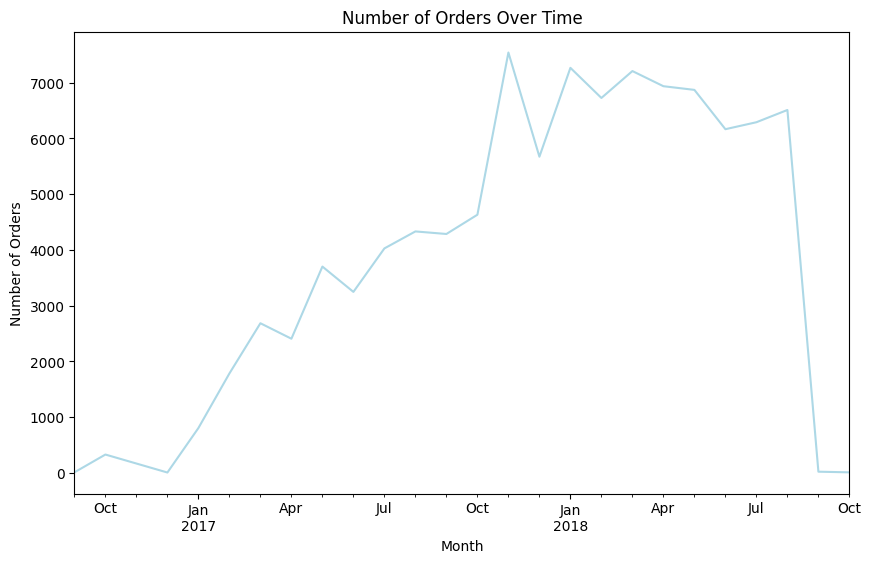

In [16]:
# Plot orders over time
orders.groupby('order_purchase_month')['order_id'].count().plot(kind='line', figsize=(10,6), color='lightblue')
plt.title("Number of Orders Over Time")
plt.ylabel("Number of Orders")
plt.xlabel("Month")
plt.show()

12. Orders by Day of the Week

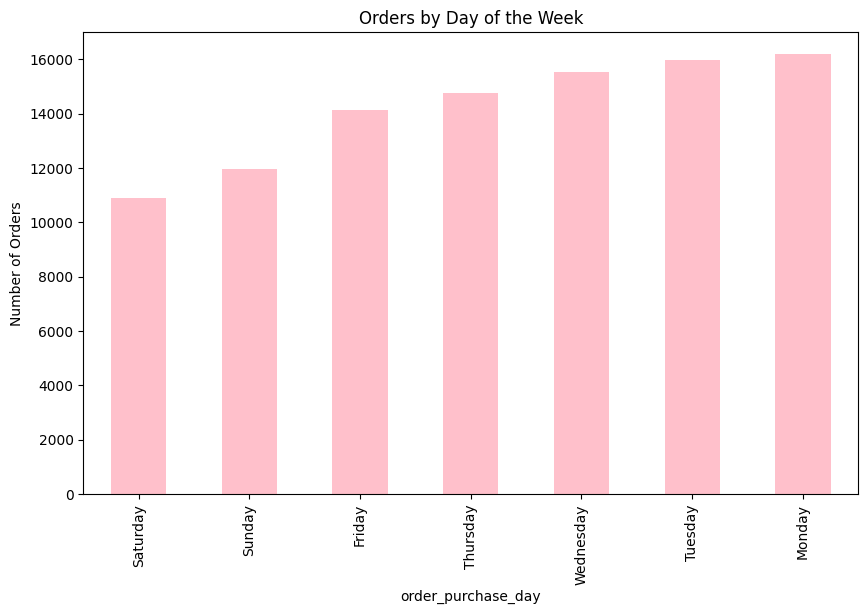

In [17]:
# Orders per day of the week
orders['order_purchase_day'] = orders['order_purchase_timestamp'].dt.day_name()
orders_by_day = orders.groupby('order_purchase_day')['order_id'].count().sort_values()
orders_by_day.plot(kind='bar', figsize=(10,6), color='pink')
plt.title("Orders by Day of the Week")
plt.ylabel("Number of Orders")
plt.show()

#### **Visualization & Explanatory Analysis**

- Are there any seasonal trend in sales across different product categories? Which product categories have the most order?

In [18]:
# Merge datasets to get product category information
merged_data = orders_cleaned.merge(items, on='order_id', how='inner')
merged_data = merged_data.merge(products_cleaned, on='product_id', how='inner')

# Ensure 'category' is a DataFrame
if isinstance(category, str):
    category = pd.read_csv(data_dir + 'product_category_name_translation.csv')

# Convert 'order_purchase_timestamp' to datetime
merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp'])

# Merge with category translation to get English names
merged_data = merged_data.merge(category, on='product_category_name', how='left')

# Group by month and English product category name to count orders
seasonal_trends = merged_data.groupby(['product_category_name_english', 
                                        merged_data['order_purchase_timestamp'].dt.to_period('M')])['order_id'].count().reset_index(name='order_count')

# Rename columns for better readability
seasonal_trends.rename(columns={'product_category_name_english': 'product_category', 
                                'order_purchase_timestamp': 'order_month'}, inplace=True)

# Convert order_month to string to extract month and year
seasonal_trends['order_month'] = seasonal_trends['order_month'].dt.to_timestamp()

# Extract month and year from order_month
seasonal_trends['year'] = seasonal_trends['order_month'].dt.year
seasonal_trends['month'] = seasonal_trends['order_month'].dt.month

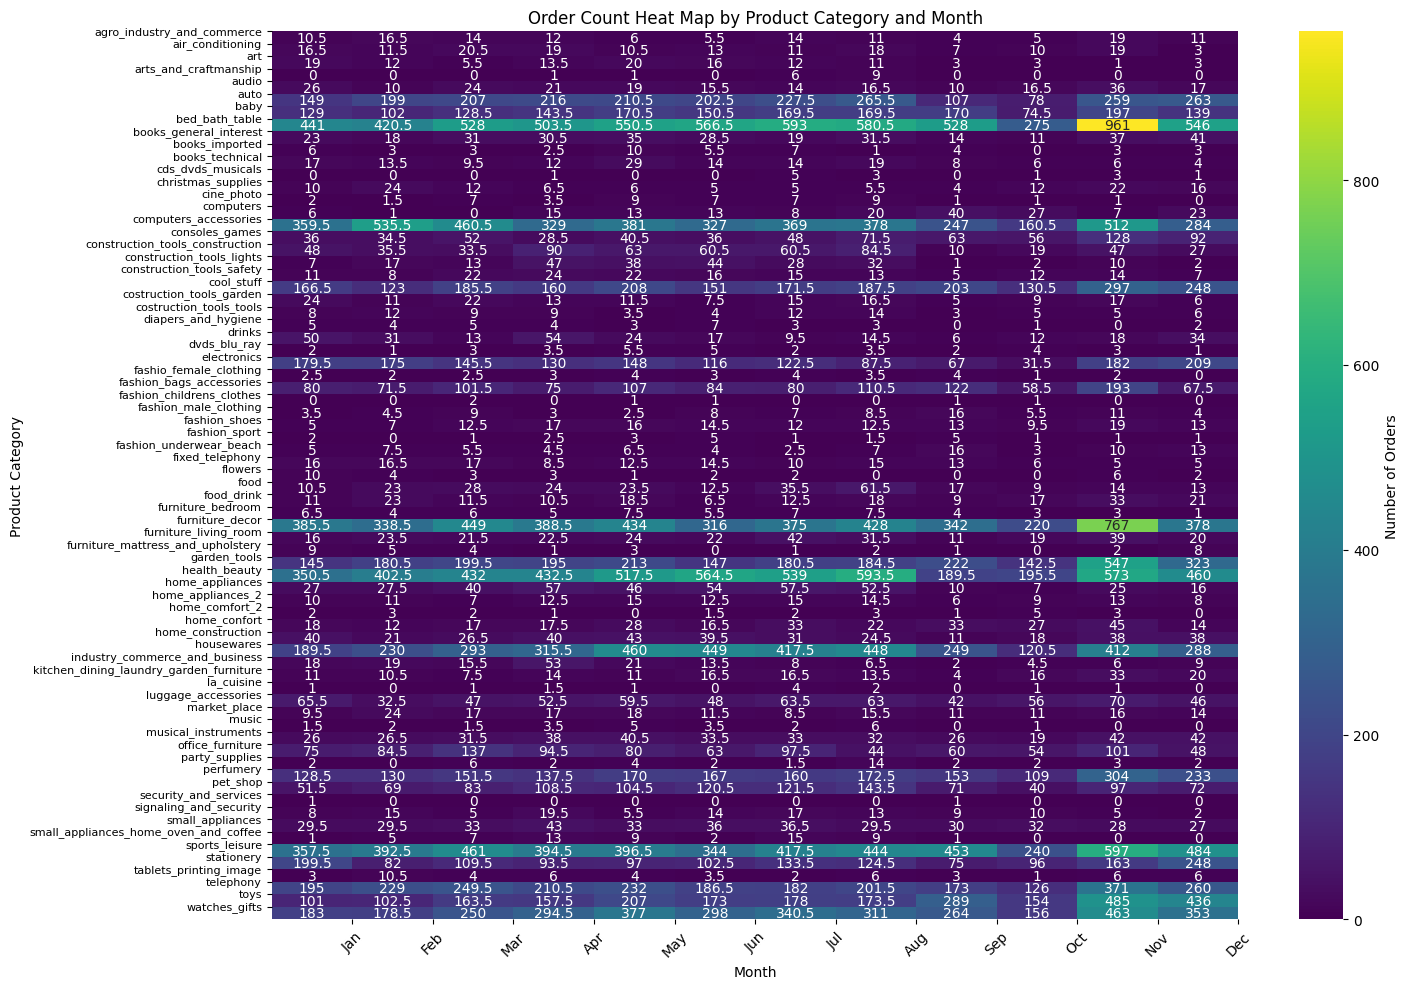

In [19]:
# Create a pivot table for the heat map
heatmap_data = seasonal_trends.pivot_table(values='order_count', 
                                            index='product_category', 
                                            columns='month', 
                                            fill_value=0)

# Create a heat map using seaborn
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='g', cbar_kws={'label': 'Number of Orders'})

# Customize the plot
plt.title('Order Count Heat Map by Product Category and Month')
plt.xlabel('Month')
plt.ylabel('Product Category')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.yticks(ticks=range(len(heatmap_data.index)), labels=heatmap_data.index, rotation=0, fontsize=8)
plt.tight_layout()

# Show the plot
plt.show()

1. Purpose:
This heat map visualizes the number of orders across different product categories throughout the year (by month)
2. X-axis:
Represents the months 
3. Y-axis:
Represents various product categories
4. Color coding:
The color represents the order count for each product category during each month, with yellowish-green colors showing higher order volumes and dark purple representing lower volumes
5. Insights:
a. Some products categories, such as "bed bath table" consistently have higher orders
b. Arts and Craftmanship and Air Conditioning generally have lower orders across months

- What are the cross-selling opportunities based on customer purchase patterns?

In [20]:
# Merge the datasets
data_merged = orders_cleaned.merge(items, on='order_id').merge(products, on='product_id').merge(category, on='product_category_name')

# Create a pivot table to count the number of times products are ordered together
cross_selling_data = data_merged.groupby('order_id')['product_category_name_english'].apply(list).reset_index()
cross_selling_data['product_pairs'] = cross_selling_data['product_category_name_english'].apply(lambda x: list(combinations(x, 2)))

# Explode the product pairs into separate rows
product_pairs = cross_selling_data.explode('product_pairs')

# Create a DataFrame to count the occurrences of each product pair
cross_sell_matrix = product_pairs['product_pairs'].value_counts().reset_index()
cross_sell_matrix.columns = ['product_pair', 'count']

# Split the product pairs into two separate columns
cross_sell_matrix[['product_a', 'product_b']] = pd.DataFrame(cross_sell_matrix['product_pair'].tolist(), index=cross_sell_matrix.index)

# Filter out pairs where product_a and product_b are the same
cross_sell_matrix = cross_sell_matrix[cross_sell_matrix['product_a'] != cross_sell_matrix['product_b']]

# Display the cross-sell matrix sample
print(cross_sell_matrix.head())



                         product_pair  count        product_a        product_b
30  (furniture_decor, bed_bath_table)     66  furniture_decor   bed_bath_table
33  (bed_bath_table, furniture_decor)     62   bed_bath_table  furniture_decor
44    (furniture_decor, garden_tools)     34  furniture_decor     garden_tools
45     (home_confort, bed_bath_table)     33     home_confort   bed_bath_table
49     (bed_bath_table, home_confort)     25   bed_bath_table     home_confort


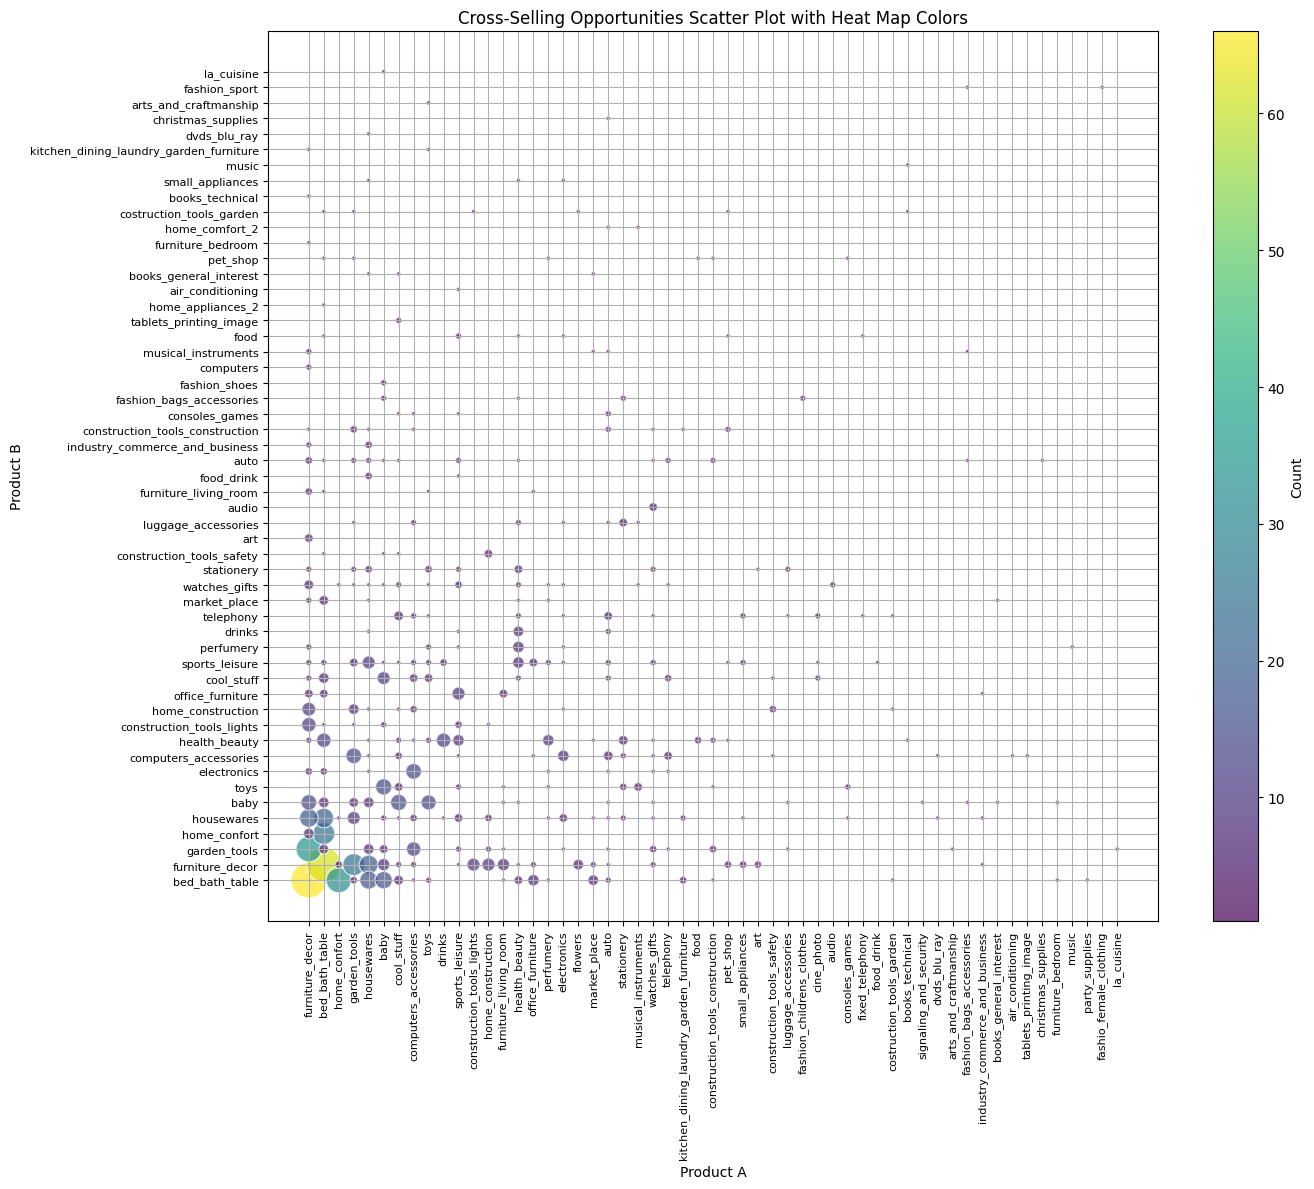

In [21]:
# Create a color map based on the count of product pairs
norm = plt.Normalize(cross_sell_matrix['count'].min(), cross_sell_matrix['count'].max())
colors = plt.cm.viridis(norm(cross_sell_matrix['count']))  # You can choose other colormaps too, e.g., 'plasma', 'inferno', etc.

plt.figure(figsize=(14, 12))
scatter = plt.scatter(cross_sell_matrix['product_a'], cross_sell_matrix['product_b'], 
                    s=cross_sell_matrix['count']*10,  # Adjust size factor as needed
                    c=cross_sell_matrix['count'],  # Use count for color
                    cmap='viridis',  # Choose a colormap
                    alpha=0.7,
                    edgecolors='w')

plt.colorbar(scatter, label='Count')  # Add colorbar to indicate counts
plt.xlabel('Product A')
plt.ylabel('Product B')
plt.title('Cross-Selling Opportunities Scatter Plot with Heat Map Colors')
plt.xticks(rotation=90, size=8)
plt.yticks(size=8)
plt.grid()
plt.tight_layout()
plt.show()

1. Purpose:
This scatter plot shows the cross-selling opportunities between product categories based on how frequently different products are ordered together
2. X-axis:
Product A
3. Y-axis:
Product B
4. Size of Circles:
The size represents the frequency of these products being ordered together. Larger circles indicate higher counts of co-purchased products
5. Color Gradient:
Works similar to a heatmap, where colors close to yellow represent higher frequencies of co-purchase and darker shades represent lower frequencies
6. Insights:
a. Bed Bath Table and Furniture Decor have a higher frequency of being ordered together (indicated by a large yellowish-green circle)
b. This type of plot helps identify complementary products that are often bought together, aiding in cross-selling opportunities
c. Products like books imported and auto have fewer or no connections, suggesting they are less frequently cross-sold with other items

#### Analisis Lanjutan (Opsional)

### - Are there any seasonal trend in sales across different product categories? Which product categories have the most order?

In [27]:
# Merge datasets to get customer and order details
df = orders.merge(items, on='order_id').merge(payments, on='order_id')

# Calculate RFM values
snapshot_date = orders['order_purchase_timestamp'].max() + pd.DateOffset(days=1)

rfm = df.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (snapshot_date - x.max()).days,
    'order_id': 'count',
    'payment_value': 'sum'
}).rename(columns={
    'order_purchase_timestamp': 'Recency',
    'order_id': 'Frequency',
    'payment_value': 'Monetary'
})

# Assign RFM scores, handle potential duplicates
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=False, retbins=False, duplicates='drop') + 1
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 5, labels=False, retbins=False, duplicates='drop') + 1
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=False, retbins=False, duplicates='drop') + 1

# Combine scores into a single RFM score
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Segment customers
def rfm_segment(row):
    if row['RFM_Score'] in ['11', '12', '13', '21', '22', '23']:
        return 'High Value'
    elif row['RFM_Score'] in ['31', '32', '33', '41', '42', '43']:
        return 'Medium Value'
    else:
        return 'Low Value'

rfm['Segment'] = rfm.apply(rfm_segment, axis=1)

# Display the RFM analysis
print(rfm.head())

                                  Recency  Frequency  Monetary  R_Score  \
customer_id                                                               
00012a2ce6f8dcda20d059ce98491703      338          1    114.74        4   
000161a058600d5901f007fab4c27140      459          1     67.41        5   
0001fd6190edaaf884bcaf3d49edf079      597          1    195.42        5   
0002414f95344307404f0ace7a26f1d5      428          1    179.35        4   
000379cdec625522490c315e70c7a9fb      199          1    107.01        2   

                                  F_Score  M_Score RFM_Score    Segment  
customer_id                                                              
00012a2ce6f8dcda20d059ce98491703        1        3       413  Low Value  
000161a058600d5901f007fab4c27140        1        2       512  Low Value  
0001fd6190edaaf884bcaf3d49edf079        1        4       514  Low Value  
0002414f95344307404f0ace7a26f1d5        1        4       414  Low Value  
000379cdec625522490c315e70c7a9

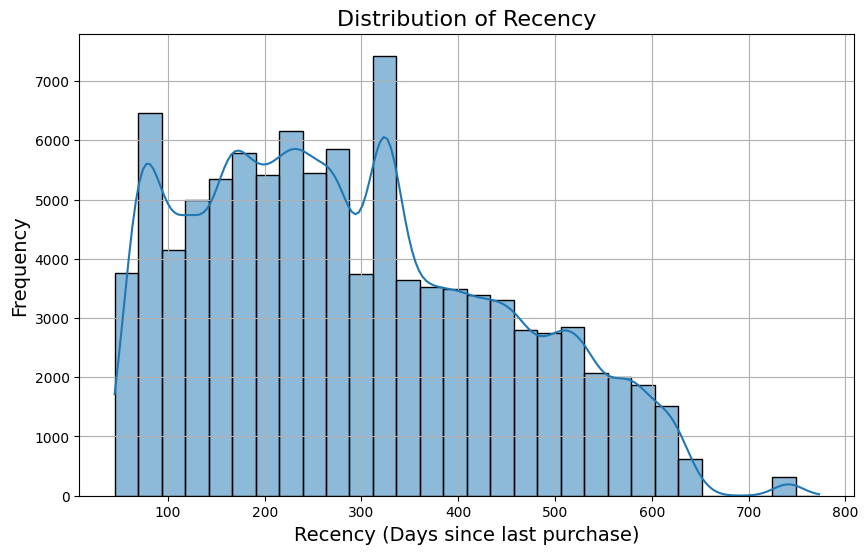

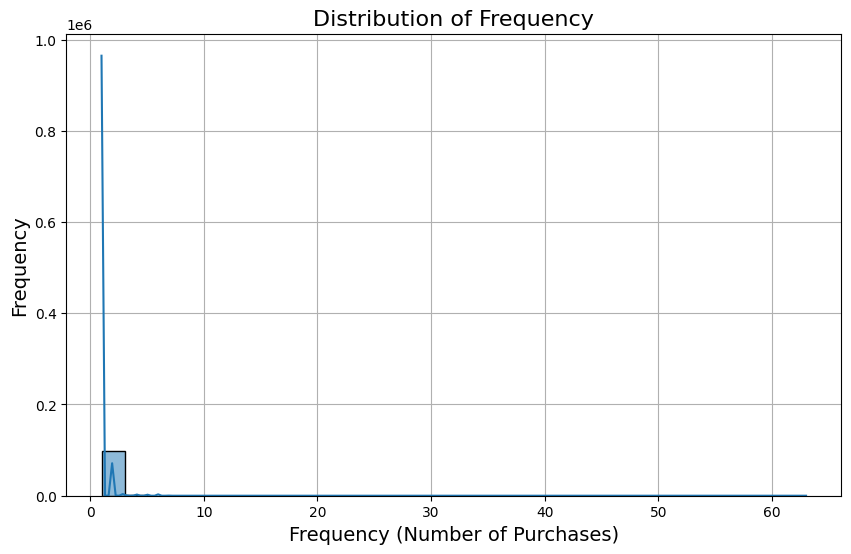

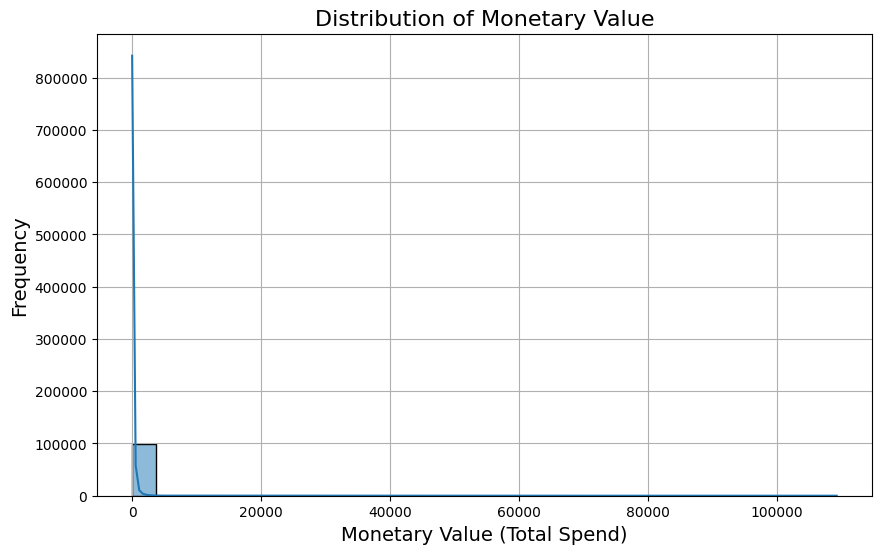

C:\Users\Allycia\AppData\Local\Temp\ipykernel_19260\942096374.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='RFM_Score', order=rfm['RFM_Score'].value_counts().index, palette='viridis')


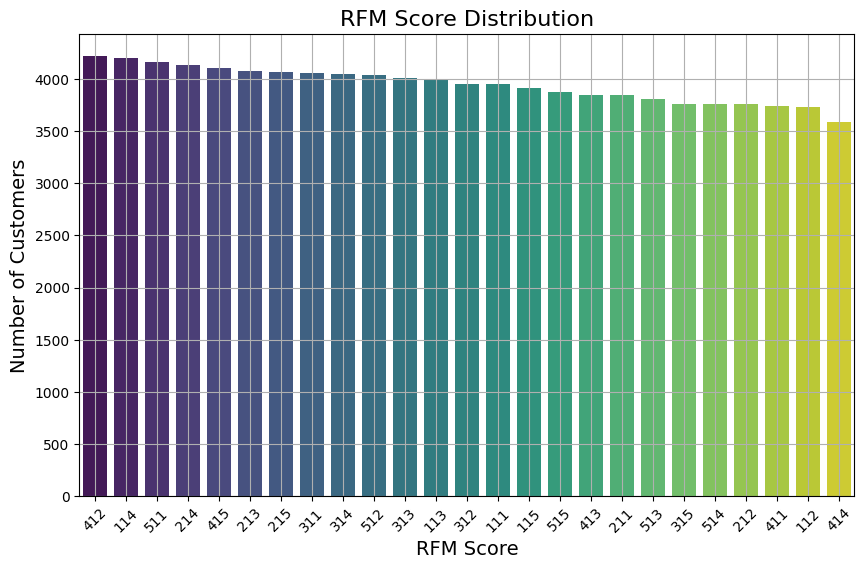

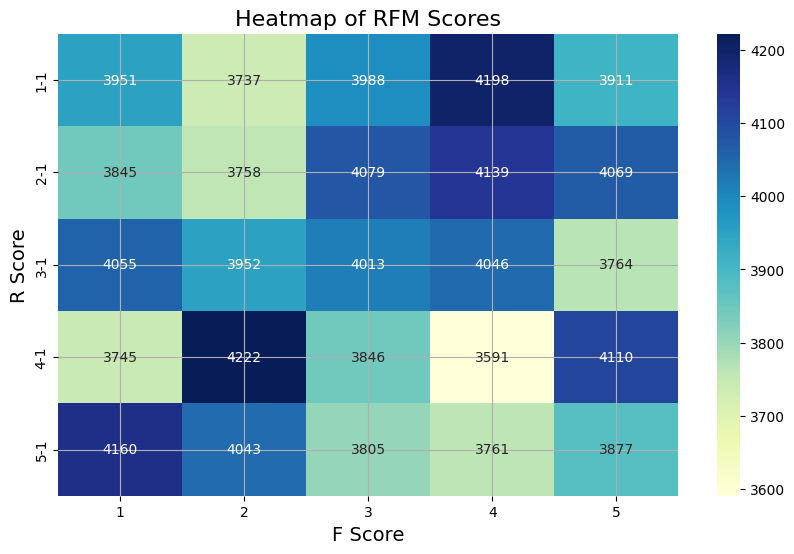

In [29]:
# 1. Distribution of Recency
plt.figure(figsize=(10, 6))
sns.histplot(rfm['Recency'], bins=30, kde=True)
plt.title('Distribution of Recency', fontsize=16)
plt.xlabel('Recency (Days since last purchase)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid()
plt.show()

# 2. Distribution of Frequency
plt.figure(figsize=(10, 6))
sns.histplot(rfm['Frequency'], bins=30, kde=True)
plt.title('Distribution of Frequency', fontsize=16)
plt.xlabel('Frequency (Number of Purchases)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid()
plt.show()

# 3. Distribution of Monetary Value
plt.figure(figsize=(10, 6))
sns.histplot(rfm['Monetary'], bins=30, kde=True)
plt.title('Distribution of Monetary Value', fontsize=16)
plt.xlabel('Monetary Value (Total Spend)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid()
plt.show()

# 4. RFM Score Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=rfm, x='RFM_Score', order=rfm['RFM_Score'].value_counts().index, palette='viridis')
plt.title('RFM Score Distribution', fontsize=16)
plt.xlabel('RFM Score', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(rotation=45)
plt.grid()
plt.show()

# 5. Heatmap of RFM Scores
plt.figure(figsize=(10, 6))
rfm_heatmap_data = rfm.groupby(['R_Score', 'F_Score', 'M_Score']).size().unstack(fill_value=0)
sns.heatmap(rfm_heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of RFM Scores', fontsize=16)
plt.xlabel('F Score', fontsize=14)
plt.ylabel('R Score', fontsize=14)
plt.grid()
plt.show()


1. Distribution of Recency: Shows how many days it has been since customers last purchased, helping identify how recent the customers are.
2. Distribution of Frequency: Displays the number of purchases made by customers, allowing for insight into repeat customers.
3. Distribution of Monetary Value: Illustrates the total spending by customers, which can indicate high-value customers.
4. RFM Score Distribution: Visualizes the distribution of RFM scores across all customers to understand the score concentration.
5. Heatmap of RFM Scores: Provides a visual representation of the interactions between different RFM scores, which can highlight trends in customer behavior.

#### Conclusion

1. Are there any seasonal trend in sales across different product categories? Which product categories have the most order?
- The heatmap reveals seasonal trends in customer purchasing behavior, with certain categories like "bed_bath_table" and "auto" seeing consistent or high demand during specific months. This insight can guide inventory management and promotional strategies, ensuring businesses are well-prepared for peak demand periods while considering discounts or marketing for lower-demand categories.

2. What are the cross-selling opportunities based on customer purchase patterns?
- The scatter plot uncovers strong cross-selling opportunities between product pairs like "furniture_living_room" and "bed_bath_table" or "computers_accessories" and "games_consoles," indicating frequent joint purchases. This insight can be leveraged to enhance product recommendations, bundle deals, and in-store or online product placements, ultimately driving increased sales and customer engagement.